In [1]:
import sys
import numpy as np
import os
sys.path.append(os.path.expanduser("~/git/machine_learning/src"))
import importlib
import models
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
sys.path.insert(0,os.path.expanduser("~/git/machine_learning/src"))

2023-08-29 11:26:57.827179: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-29 11:26:57.862911: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dir = os.path.expanduser("~m2d/git/analysis_playground/ml/data/training_data")

pars = np.load(os.path.join(data_dir, "orhs2_pars.npy"))
refl = np.load(os.path.join(data_dir, "orhs2_data.npy"))
q_values = np.load(os.path.join(data_dir, "orhs2_q_values.npy"))

print(pars.shape)
print(refl.shape)
print(q_values.shape)

idx = 0
nset=10000

refl= np.asarray(refl[:-nset])
pars= np.asarray (pars[:-nset])

testset= np.asarray(refl[-nset:])
testpars = np.asarray (pars[-nset:])

(3000000,)
(3000000, 100)
(100,)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(refl, pars)

pred_class = neigh.predict(testset)
prob_class = neigh.predict_proba(testset)

In [4]:
testpars = np.load(os.path.join(data_dir, "orhs2-pars_pars.npy"))
testset = np.load(os.path.join(data_dir, "orhs2-pars_data.npy"))
print(testpars.shape)

(2000000, 7)


In [20]:
pred_class = neigh.predict(testset[:10000])
prob_class = neigh.predict_proba(testset[:10000])

In [24]:
pred_class=neigh.predict(idx_realgood[:1000])

In [26]:
testpars=np.ones(1000)*2
accuracy_knn=models.accuracy(testpars, pred_class)

[0, 0, 0, 0]
Layer Accuracy : nan
[163, 837, 0, 0]
Layer Accuracy : 0.837
[0, 0, 0, 0]
Layer Accuracy : nan
[0, 0, 0, 0]
Layer Accuracy : nan
Accuracy: 0.837


In [ ]:

idx_realgood=[]
for i in range(len(testset)-1):
    if testpars[i,4]>-abs(0.5):
        idx_realgood.append(testset[i])

idx_realgood=np.asarray(idx_realgood)

print(idx_realgood)


In [18]:

idx_good = pred_class==2
#use this to limit parameter idx=4 
idx_bad = pred_class==1

print(testpars[:10000][idx_good].shape)
print(testpars[:10000][idx_bad].shape)
print(testpars[:10000][idx_good][0])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10000 but corresponding boolean dimension is 1000

(100000, 7)
(7845, 7)


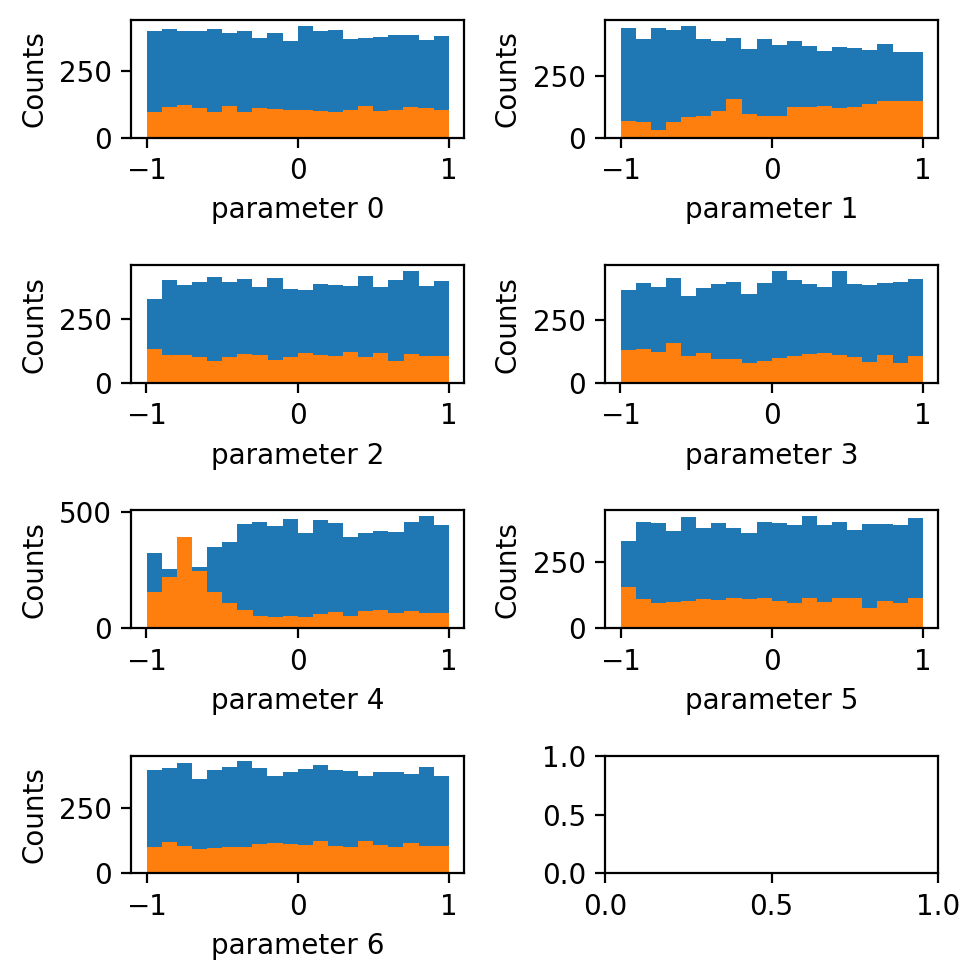

In [59]:
n_bins=40
print(pars.shape)
fig, axs= plt.subplots(4,2, sharey=False, tight_layout= True, dpi=200, figsize= (5,5))
print(testpars[:10000][idx_good].shape)
true_values=testpars[:10000][idx_good].T

bad_values=testpars[:10000][idx_bad].T



for i in range(7):
    ax=plt.subplot(4, 2, i+1)
    ax.hist(true_values[i], bins=20)

    ax.hist(bad_values[i], bins=20)

    plt.ylabel('Counts')
    plt.xlabel('parameter %s' % i)
